In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer

In [5]:
train_df=pd.read_csv('disaster tweets.csv')


In [6]:
train_df.sample(14)

,id,keyword,location,text,target
5257,7518,oil%20spill,Canada,DTN Brazil: Refugio oil spill may have been co...,1
1462,2110,catastrophe,"Wellington, New Zealand",@APPLEOFFIClAL Migrating from iPhoto to Photo ...,0
5760,8221,riot,"Montana, USA",I liked a @YouTube video http://t.co/lAmsdzKCu...,0
383,552,arson,"Charlotte, NC",Add Familia to the arson squad.,0
5365,7654,panic,"Linton Hall, VA",Is it time to panic now? https://t.co/OrxDQfz0J0,0
5423,7739,panicking,South Florida,People are finally panicking about cable TV ht...,0
2944,4233,drowned,"Jacksonville Beach, FL",Jacksonville family bands together as memoria...,1
1157,1666,bombing,NaN,Oh and fuck Bill Clinton for bombing us and fu...,0
5437,7756,police,"anzio,italy",4 police officers arrested for abusing childre...,1
6658,9541,terrorist,Iraq|Afghanistan| RSA |Baghdad,Don't say @ALIPAPER: women got problems this #...,0


In [7]:





print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [8]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
train_df.sample(15)

,id,keyword,location,text,target
3110,4464,electrocuted,not so cool KY,Michael talking about when he was electrocuted...,1
7353,10525,wildfire,NaN,#IDFire Cherokee Road and Road 22 (Three Siste...,1
1016,1475,body%20bagging,MI,8 hours of bagging groceries = an aching body,0
5880,8399,sandstorm,United States,I liked a @YouTube video http://t.co/xR3xJJ8gJ...,0
1163,1675,bridge%20collapse,NaN,Sioux City Fire Officials Believe Bridge Colla...,1
4693,6670,landslide,Detroit/Windsor,Now Playing: Landslide by Smashing Pumpkins ht...,0
7587,10841,NaN,NaN,Sirens everywhere!,0
5585,7970,razed,NaN,http://t.co/iXiYBAp8Qa The Latest: More homes ...,1
3126,4490,electrocuted,"Mumbai, Maharashtra",Watching a man electrocuted on the roof of #mu...,1
739,1070,bleeding,AEP,lets see how good you are at soccer when you'r...,0


In [10]:
train_df.isnull().sum()/len(train_df)*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [11]:

train_df.duplicated().sum()

0

target
0    4342
1    3271
Name: count, dtype: int64


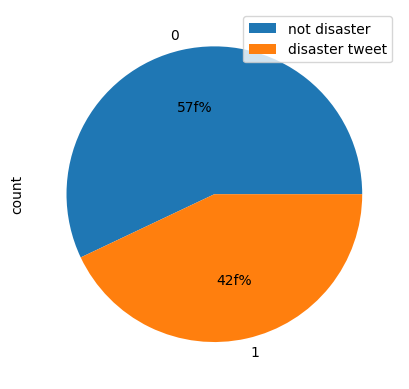

In [12]:
print(train_df['target'].value_counts())
train_df['target'].value_counts().plot(kind='pie',autopct='%2.if%%')
plt.legend(['not disaster', 'disaster tweet'])



plt.show()

In [13]:
train_df['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [14]:
pd.crosstab(train_df['location'],train_df['target']==0)

target,False,True
location,,
,1,0
Glasgow,0,1
"Melbourne, Australia",0,1
News,1,0
å_,0,1
...,...,...
å_: ?? ÌÑ ? : ?,0,1
å_å_Los Mina Cityã¢,0,1
å¡å¡Midwest Û¢Û¢,0,1


In [15]:
train_df=train_df.drop(columns=['id','location','keyword'],axis=1)

In [16]:
train_df.isnull().sum()

text      0
target    0
dtype: int64

In [17]:
train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [18]:
train_df.sample(20)

,text,target
7111,@TeaFrystlik -- causing the entire sky around ...,0
6495,@silverstar58200 I felt bad for Romero. He car...,0
6970,@Kamunt Holy crap it's been forever since I sa...,0
697,I'm crazy enough to run in 95 degree mid-day h...,0
1418,ÛÏThe road to power is paved with hypocrisy a...,0
6756,I'm a tornado looking for a soul to take,0
6766,@Ayshun_Tornado then don't,0
2313,It was finally demolished in the spring of 201...,0
681,Come and join us Tomorrow!\nAugust 7 2015 at T...,0
5954,@estellasrevenge the first time i went swiming...,0


In [19]:

    import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

# Contraction mapping dictionary
contraction_mapping = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
    "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
    "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
    "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not",
    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
    "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
    "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
    "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have",
    "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
    "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
    "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
    "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ay284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:

train_df['text_col_word_count']=train_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
train_df.sample(20)

,text,target,text_col_word_count
5228,@ashberxo @mind_mischief the removal of all tr...,0,14
4488,@Nervana_1 \nAs per previous behaviour JAN/AQ ...,1,22
7140,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,15
5921,@mogacola @zamtriossu i screamed after hitting...,0,9
4088,@modnao23 the hail is ruining everything. Plus...,1,31
4635,Most of us ddnt get this English RT @ReIgN_Co...,0,21
1465,.@uriminzok The coming catastrophe of the dest...,0,23
2988,@Homukami Only URs and SRs matter Rs you'll be...,0,23
5108,573 deaths have been certified by the Governme...,1,12
1254,MaFireEMS: RT WMUR9: Two buildings involved in...,1,23


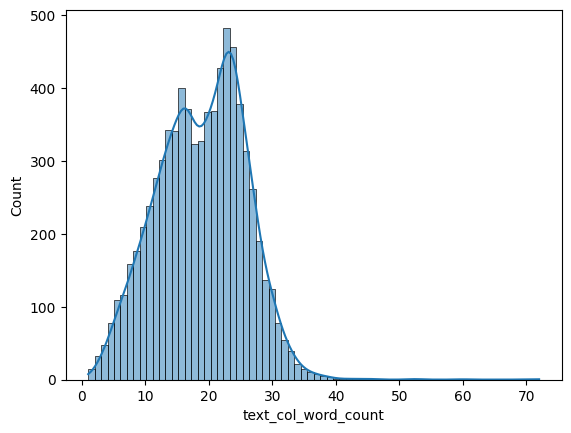

In [22]:
sns.histplot(train_df['text_col_word_count'],kde=True)
plt.show()

text_col_word_count
23    6.344411
24    6.002890
22    5.608827
16    5.254170
25    4.965191
17    4.873243
21    4.846972
20    4.820701
14    4.492316
15    4.479180
19    4.295284
18    4.242743
26    4.124524
13    3.953763
12    3.625378
27    3.441482
11    3.126231
10    2.758440
28    2.495731
9     2.324970
8     2.088533
29    1.786418
30    1.628793
7     1.523709
6     1.431761
5     1.011428
31    1.011428
32    0.709313
4     0.630500
33    0.512282
3     0.433469
34    0.275844
35    0.183896
36    0.131354
2     0.118219
37    0.091948
1     0.078813
38    0.065677
39    0.052542
41    0.013135
52    0.013135
70    0.013135
40    0.013135
43    0.013135
46    0.013135
44    0.013135
45    0.013135
72    0.013135
60    0.013135
53    0.013135
42    0.013135
Name: count, dtype: float64


<Axes: >

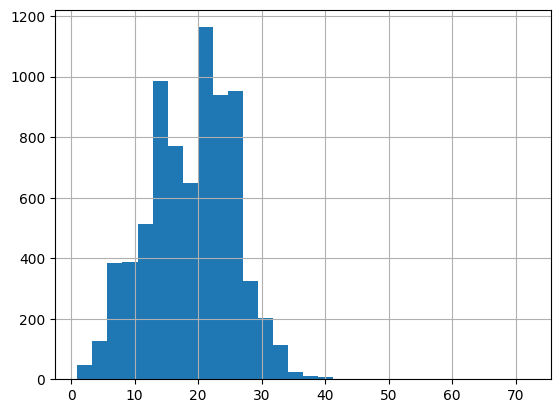

In [23]:

vc=train_df['text_col_word_count'].value_counts()/len(train_df)*100
print(vc)

train_df['text_col_word_count'].hist(bins=30)


In [24]:
pd.crosstab(train_df['target'],['text_col_word_count'])

col_0,text_col_word_count
target,
0,4342
1,3271


In [25]:
train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [26]:
train_df['text_col_char__count']=train_df['text'].apply(len)

In [27]:
train_df.sample(4)

,text,target,text_col_word_count,text_col_char__count
5669,Officials rescue 367 migrants off Libya; 25 bo...,1,18,96
2242,Anyone else getting tons of telemarketing call...,0,17,87
4951,I had a meltdown in Demi's instagram comments ...,0,12,68
6900,@CiaraMcKendry mine came on the day after my d...,0,16,86


In [28]:
train_df['text_col_sentence_count']=train_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
train_df.sample(5)

,text,target,text_col_word_count,text_col_char__count,text_col_sentence_count
2691,Ignition Knock (Detonation) Sensor-Senso fits ...,1,17,115,1
7554,James Kunstler: How bad architecture wrecked c...,0,18,118,1
1437,Benzema increasingly looks to be a casualty of...,1,21,108,3
6320,Stretcher-bearers were soldiers whose job was ...,0,22,138,1
2099,I feel like death,0,4,17,1


In [30]:
train_df['text_col_sentence_count'].value_counts()

text_col_sentence_count
1     4870
2     1743
3      689
4      203
5       77
6       15
7        8
8        3
22       1
11       1
9        1
20       1
13       1
Name: count, dtype: int64

In [31]:
train_df[train_df['target'] == 1][['text_col_sentence_count', 'text_col_char__count', 'text_col_word_count', 'target']].describe()


,text_col_sentence_count,text_col_char__count,text_col_word_count,target
count,3271.000000,3271.000000,3271.000000,3271.0
mean,1.414246,108.113421,19.258025,1.0
std,0.792105,29.309854,6.018835,0.0
min,1.000000,14.000000,2.000000,1.0
25%,1.000000,88.000000,15.000000,1.0
50%,1.000000,115.000000,20.000000,1.0
75%,2.000000,136.000000,24.000000,1.0
max,8.000000,151.000000,39.000000,1.0


In [32]:
train_df[train_df['target']==0][['text_col_sentence_count', 'text_col_char__count', 'text_col_word_count', 'target']].describe()


,text_col_sentence_count,text_col_char__count,text_col_word_count,target
count,4342.000000,4342.000000,4342.000000,4342.0
mean,1.667204,95.706817,18.661677,0.0
std,1.065912,35.885924,7.443405,0.0
min,1.000000,7.000000,1.000000,0.0
25%,1.000000,68.000000,13.000000,0.0
50%,1.000000,101.000000,19.000000,0.0
75%,2.000000,130.000000,24.000000,0.0
max,22.000000,157.000000,72.000000,0.0


In [33]:
train_df[['text_col_sentence_count','text_col_char__count','text_col_word_count','target']].describe()

,text_col_sentence_count,text_col_char__count,text_col_word_count,target
count,7613.000000,7613.000000,7613.000000,7613.00000
mean,1.558518,101.037436,18.917904,0.42966
std,0.966000,33.781325,6.873545,0.49506
min,1.000000,7.000000,1.000000,0.00000
25%,1.000000,78.000000,14.000000,0.00000
50%,1.000000,107.000000,19.000000,0.00000
75%,2.000000,133.000000,24.000000,1.00000
max,22.000000,157.000000,72.000000,1.00000


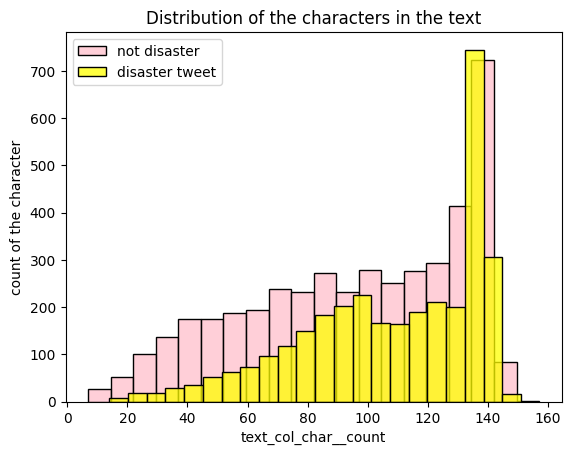

In [34]:
plt.title('Distribution of the characters in the text')
sns.histplot(train_df[train_df['target']==0]['text_col_char__count'],color='pink')
sns.histplot(train_df[train_df['target']==1]['text_col_char__count'],color='yellow')
plt.legend(['not disaster','disaster tweet'])
plt.ylabel("count of the character")
plt.show()

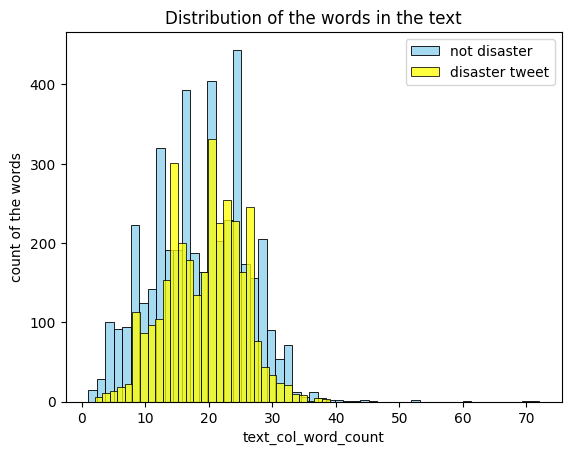

In [35]:
plt.title('Distribution of the words in the text')
sns.histplot(train_df[train_df['target']==0]['text_col_word_count'],color='skyblue')
sns.histplot(train_df[train_df['target']==1]['text_col_word_count'],color='yellow')
plt.legend(['not disaster','disaster tweet'])
plt.ylabel("count of the words")
plt.show()

<Axes: >

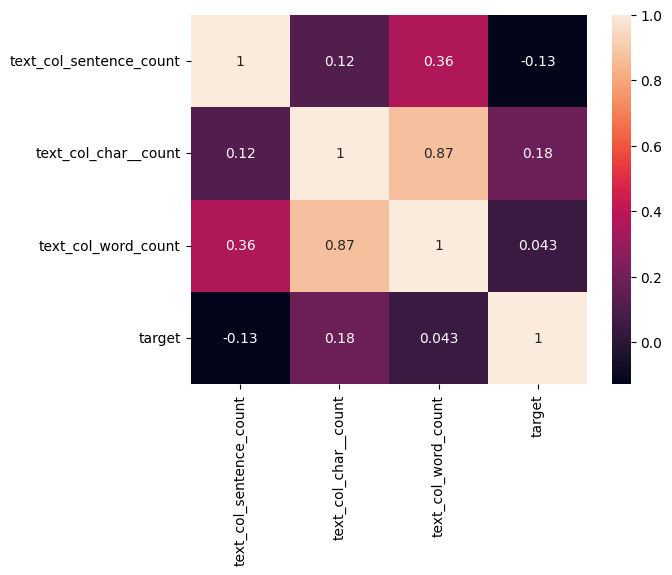

In [36]:
sns.heatmap(train_df[['text_col_sentence_count', 'text_col_char__count', 'text_col_word_count', 'target']].corr(),annot=True,color='skyblue')
           

In [37]:
ps=PorterStemmer()

In [38]:
train_df['text'][7]

"I'm on top of the hill and I can see a fire in the woods..."

In [39]:
d="I'm on top of the hill and I can see a fire in the woods..."

In [40]:
nltk.word_tokenize(d)

['I',
 "'m",
 'on',
 'top',
 'of',
 'the',
 'hill',
 'and',
 'I',
 'can',
 'see',
 'a',
 'fire',
 'in',
 'the',
 'woods',
 '...']

In [41]:
def transform_text(text):
    text = emoji.demojize(text)
    for contraction, expanded in contraction_mapping.items():
        text = re.sub(r'\b{}\b'.format(contraction), expanded, text)
    text= text.lower()
    
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [42]:
d='#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas'

In [43]:
transform_text(d)

'flood disast heavi rain caus flash flood street manit colorado spring area'

In [44]:
train_df['transformed_text']=train_df['text'].apply(transform_text)

In [45]:
train_df.head()

,text,target,text_col_word_count,text_col_char__count,text_col_sentence_count,transformed_text
0,Our Deeds are the Reason of this #earthquake M...,1,14,69,1,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,1,8,38,2,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,24,133,2,resid ask place notifi offic evacu shelter pla...
3,"13,000 people receive #wildfires evacuation or...",1,9,65,1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,18,88,1,got sent photo rubi alaska smoke wildfir pour ...


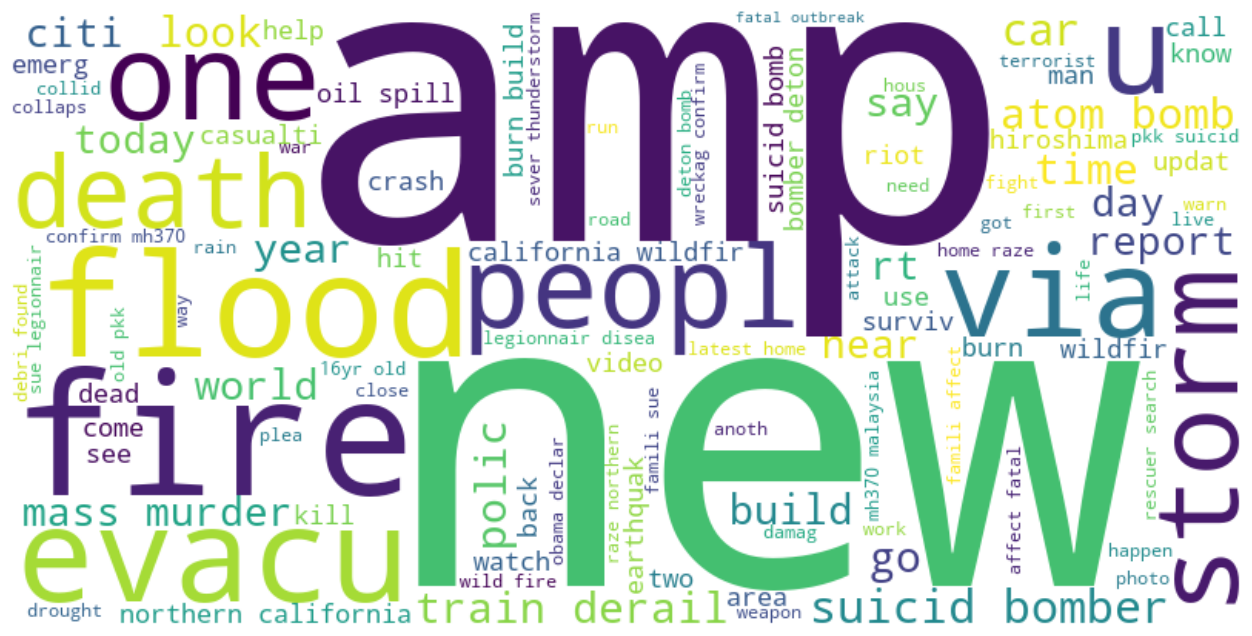

In [46]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400,min_font_size=10, background_color='white')
wc.generate(train_df[train_df['target']==1]['transformed_text'].str.cat(sep=' '))



# Display the word cloud using matplotlib
plt.figure(figsize=(20,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


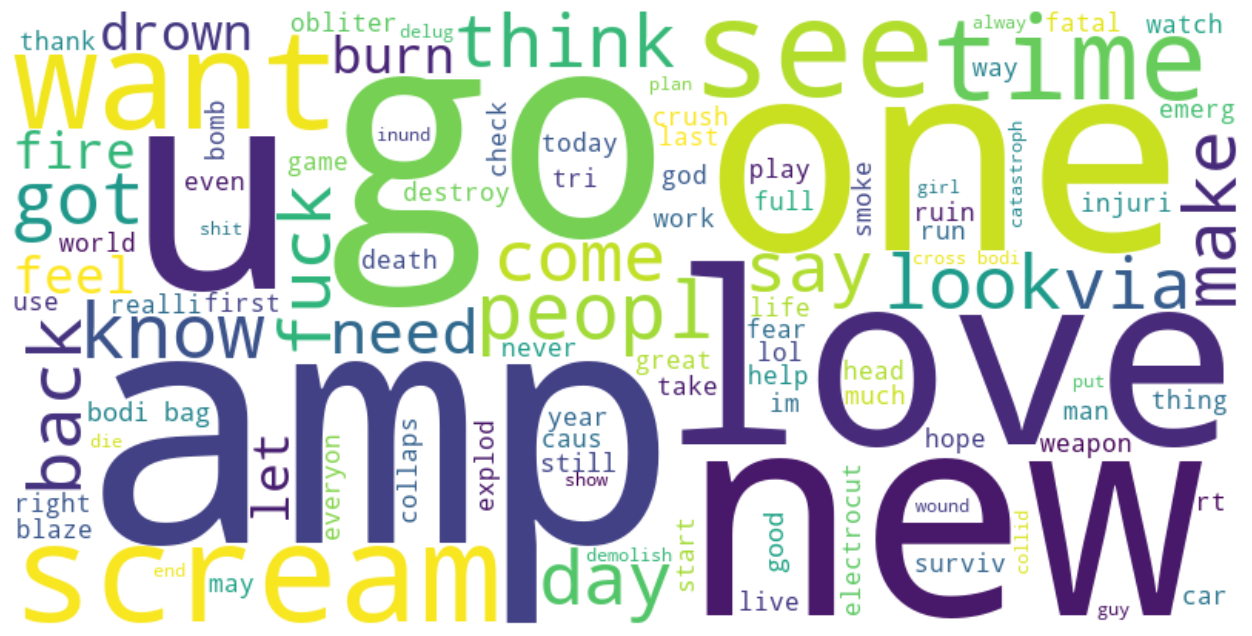

In [47]:
wc = WordCloud(width=800, height=400,min_font_size=10, background_color='white')
wc.generate(train_df[train_df['target']==0]['transformed_text'].str.cat(sep=' '))



# Display the word cloud using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [48]:
train_df.shape

(7613, 6)

In [49]:
disaster_tweets_keywords=[]
for tweet in train_df[train_df['target']==1]['transformed_text'].tolist():
    for word in tweet.split():
        disaster_tweets_keywords.append(word)
    

In [50]:
len(disaster_tweets_keywords)

33338

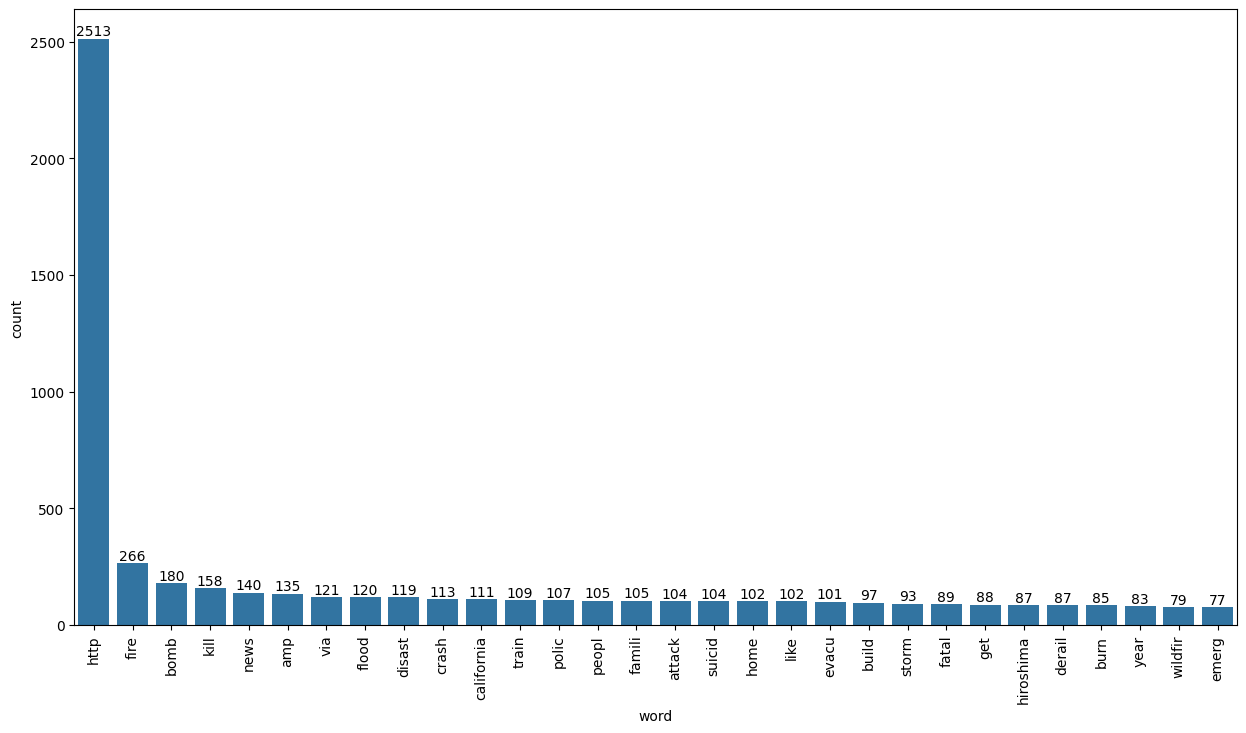

In [51]:
from collections import Counter

plt.figure(figsize=(15,8))
df_words = pd.DataFrame(Counter(disaster_tweets_keywords).most_common(30), columns=['word', 'count'])

ax = sns.barplot(x='word', y='count', data=df_words)

plt.xticks(rotation='vertical')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Format the labels to show numbers without decimals

plt.show()


In [52]:
not_disaster_tweet_words=[]
for tweet in train_df[train_df['target']==0]['transformed_text'].tolist():
    for word in tweet.split():
        not_disaster_tweet_words.append(word)

In [53]:
len(not_disaster_tweet_words)

39178

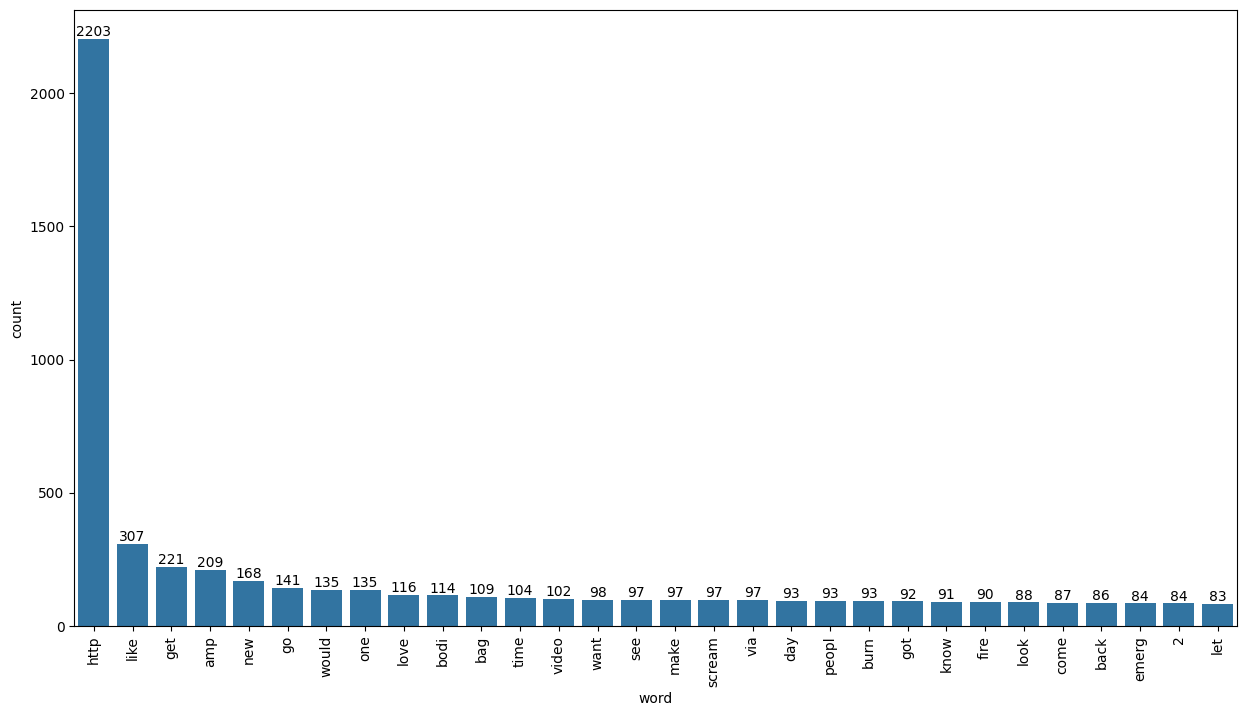

In [54]:
plt.figure(figsize=(15,8))
df_not_dis=pd.DataFrame(Counter(not_disaster_tweet_words).most_common(30),columns=['word','count'])
ax=sns.barplot(x='word',y='count',data=df_not_dis)
plt.xticks(rotation='vertical')
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')
plt.show()

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
CV=CountVectorizer()
TV=TfidfVectorizer()


In [56]:
x=TV.fit_transform(train_df['transformed_text'])

In [57]:
x

<7613x13029 sparse matrix of type '<class 'numpy.float64'>'
	with 68951 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_dense = x.toarray()  # Convert sparse matrix to dense matrix
x = scaler.fit_transform(x_dense)


In [59]:
y=train_df['target'].values

In [60]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,recall_score , f1_score

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [63]:

mnb=MultinomialNB()
svm=SVC()

In [64]:
'''mnb.fit(x_train,y_train)
y_predictor1=mnb.predict(x_test)
print(accuracy_score(y_test,y_predictor1)) 
cm=confusion_matrix(y_test,y_predictor1)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

print('precision score is',precision_score(y_test,y_predictor1))
print('recall score is',recall_score(y_test,y_predictor1))
print('f1 score is',f1_score(y_test,y_predictor1))
cross_val_scores1=np.mean(cross_val_score(svm,x, y, cv=10 ,scoring='accuracy'))
print('cross validation is',cross_val_scores1)'''

'mnb.fit(x_train,y_train)\ny_predictor1=mnb.predict(x_test)\nprint(accuracy_score(y_test,y_predictor1)) \ncm=confusion_matrix(y_test,y_predictor1)\nsns.heatmap(cm,annot=True,fmt="g",cmap="Blues")\nplt.xlabel(\'predicted\')\nplt.ylabel(\'Actual\')\nplt.show()\n\nprint(\'precision score is\',precision_score(y_test,y_predictor1))\nprint(\'recall score is\',recall_score(y_test,y_predictor1))\nprint(\'f1 score is\',f1_score(y_test,y_predictor1))\ncross_val_scores1=np.mean(cross_val_score(svm,x, y, cv=10 ,scoring=\'accuracy\'))\nprint(\'cross validation is\',cross_val_scores1)'

0.8125746120175089


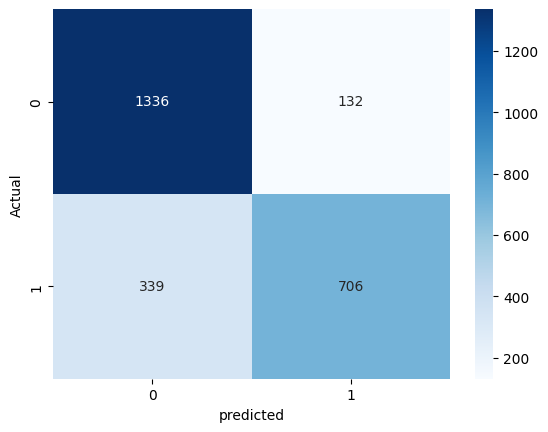

precision score is 0.8424821002386634
recall score is 0.6755980861244019
f1 score is 0.7498672331386086
cross validation is 0.6804206717918472


In [65]:
LSTR=LogisticRegression()
LSTR.fit(x_train,y_train)
y_predictor1=LSTR.predict(x_test)
print(accuracy_score(y_test,y_predictor1)) 
cm=confusion_matrix(y_test,y_predictor1)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

print('precision score is',precision_score(y_test,y_predictor1))
print('recall score is',recall_score(y_test,y_predictor1))
print('f1 score is',f1_score(y_test,y_predictor1))
cross_val_scores1=np.mean(cross_val_score(LSTR,x, y, cv=10 ,scoring='accuracy'))
print('cross validation is',cross_val_scores1)

0.8157580580978909


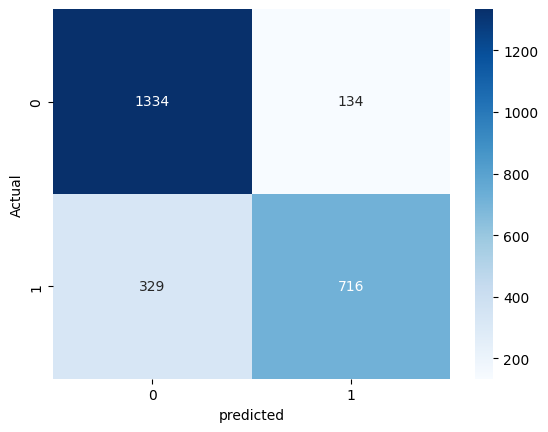

0.8423529411764706
recall score is 0.6851674641148325
f1 score is 0.7556728232189973
cross validation is 0.6993350371282434


In [66]:
bnb=BernoulliNB()
bnb.fit(x_train, y_train)

y_predictor3 = bnb.predict(x_test)

print(accuracy_score(y_test, y_predictor3))
cm_=confusion_matrix(y_test,y_predictor3)
sns.heatmap(cm_,annot=True,fmt="g",cmap="Blues")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
print(precision_score(y_test,y_predictor3))
print('recall score is',recall_score(y_test,y_predictor3))
print('f1 score is',f1_score(y_test,y_predictor3))
cross_val_scoress=np.mean(cross_val_score(bnb,x, y, cv=10 ,scoring='accuracy'))
print('cross validation is',cross_val_scoress)


In [68]:
import pickle
pickle.dump(TV,open('tfidfvectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))